<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/classdemo/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent for Linear Regression**

This notebook shows an example of using Gradient Descent to solve a Linear Regression problem in a Machine Learning context using publicly available data for the USA life expectancy at birth over time.

---

In [1]:
# -- import libraries
import pandas as pd
import numpy as np
import pylab as plt

In [2]:
# -- read data
wbdat = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/wbank_US_leb.csv")

In [3]:
# -- explore data
wbdat.head()

,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854


In [4]:
wbdat.tail()

,year,leb
55,2015,78.690244
56,2016,78.539024
57,2017,78.539024
58,2018,78.639024
59,2019,78.787805


In [5]:
wbdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   leb     60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [6]:
wbdat.describe()

,year,leb
count,60.000000,60.000000
mean,1989.500000,74.806545
std,17.464249,3.000358
min,1960.000000,69.770732
25%,1974.750000,72.442683
50%,1989.500000,75.115854
75%,2004.250000,77.487805
max,2019.000000,78.841463


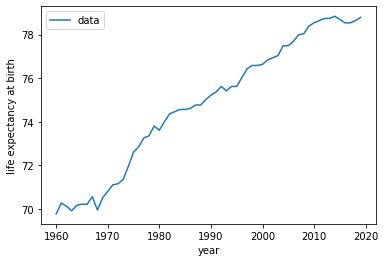

In [11]:
# -- plot data
ax = wbdat.plot("year", "leb", label="data")
ax.set_xlabel("year")
ax.set_ylabel("life expectancy at birth")
ax.legend();

## Fit a line using gradient descent

In [12]:
# -- define the objective funtion: sum of square errors
def sumsqerr(Y_obs, Y_pred):
  return np.sum((Y_obs - Y_pred)**2)

In [13]:
# -- extract the X and Y variables into separate arrays
X = wbdat["year"].values
Y = wbdat["leb"].values

# -- set the initial values for slope and intercept
slope = [0.1]
intercept = [-250]

# -- set the learning rate (step size)
Lrate = 1e-9

# -- set the number of iterations to perform gradient descent
epochs = 20

# -- create a list to use for saving SSE values
Y_pred = slope[-1] * X + intercept[-1]
sse = [sumsqerr(Y, Y_pred)]

# -- perform Gradient Descent 
for i in range(epochs): 
  # -- calculate the gradients for slope and intercept
  D_m = -2 * sum(X * (Y - Y_pred))  # Derivative wrt slope
  D_c = -2 * sum(Y - Y_pred)  # Derivative wrt intercept

  # -- calculate and update the new slope and intercept
  slope.append(slope[-1] - Lrate * D_m)
  intercept.append(intercept[-1] - Lrate * D_c)

  # -- calculate the new predicted value of Y
  Y_pred = slope[-1] * X + intercept[-1]

  # -- calculate and add the new SSE to list
  sse.append(sumsqerr(Y, Y_pred))

In [14]:
print("The final model for predicting life expectanct at birth is:")
print("leb = {0:.3f} * year + {1:.1f}".format(slope[-1], intercept[-1]))

The final model for predicting life expectanct at birth is:
leb = 0.163 * year + -250.0


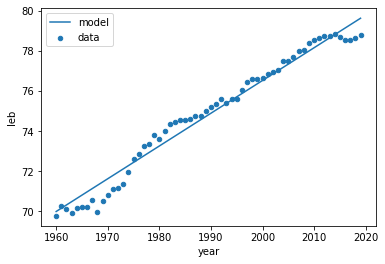

In [15]:
# -- plot the data and the model 
ax = wbdat.plot("year", "leb", kind="scatter", label="data")
x = np.arange(1960, 2020, 1)
y = slope[-1]*x + intercept[-1]
ax.plot(x, y, label="model")
ax.legend();

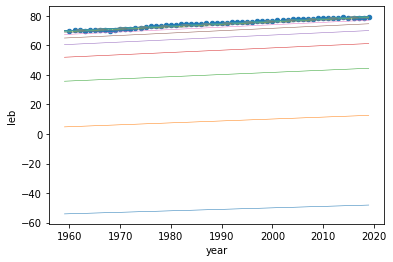

In [16]:
# -- plot all lines learned
ax = wbdat.plot("year", "leb", kind="scatter")
x = np.arange(1959, 2020, 1)
for s, i in zip(slope, intercept):
  y = s*x + i
  ax.plot(x, y, lw=0.5)

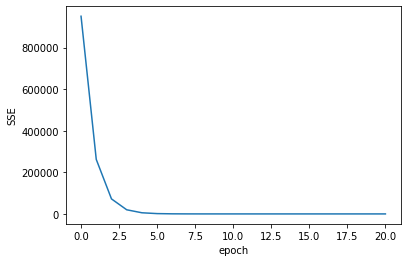

In [17]:
# -- plot the sum of squared errors after each step
plt.plot(sse)
plt.xlabel("epoch")
plt.ylabel("SSE");

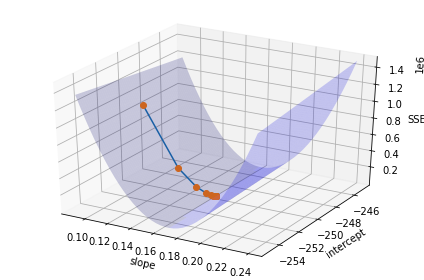

In [18]:
# -- plot the SSE surface and the gradient descent's search for best slope and intercept

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')

ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("SSE")

def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)

ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(X, Y, theta) 
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)

fig.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import r2_score

Y_pred = slope[-1]*X + intercept[-1]
print("r2 of model = {0:.1f}%".format(r2_score(Y, Y_pred)*100))

r2 of model = 97.2%


# Stochastic Gradient Descent

In [20]:
# -- extract the X and Y variables into separate arrays
X = wbdat["year"].values
Y = wbdat["leb"].values

# -- set the initial values for slope and intercept
slope = [0.1]
intercept = [-250]

# -- set the learning rate (step size)
Lrate = 1e-8

# -- set the number of iterations to perform gradient descent
epochs = 5

# -- create a list to use for saving SSE values
ind = np.random.choice(len(X), int(len(X)/6))
X_sub = X[ind]
Y_sub = Y[ind]
Y_pred = slope[-1]*X_sub + intercept[-1]
sse = [sumsqerr(Y_sub, Y_pred)]

# -- perform Gradient Descent 
for i in range(epochs): 
  # -- calculate the gradients for slope and intercept
  D_m = -2 * sum(X_sub * (Y_sub - Y_pred))  # Derivative wrt slope
  D_c = -2 * sum(Y_sub - Y_pred)  # Derivative wrt intercept

  # -- calculate and update the new slope and intercept
  slope.append(slope[-1] - Lrate * D_m)
  intercept.append(intercept[-1] - Lrate * D_c)

  # -- calculate the sum of squared errors and add to list
  ind = np.random.choice(len(X), int(len(X)/6))
  X_sub = X[ind]
  Y_sub = Y[ind]
  Y_pred = slope[-1]*X_sub + intercept[-1]
  sse.append(sumsqerr(Y_sub, Y_pred))
    
print("The final model for predicting life expectanct at birth is:")
print("leb = {0} * year + {1}".format(slope[-1].round(3), intercept[-1].round(2)))

The final model for predicting life expectanct at birth is:
leb = 0.163 * year + -250.0


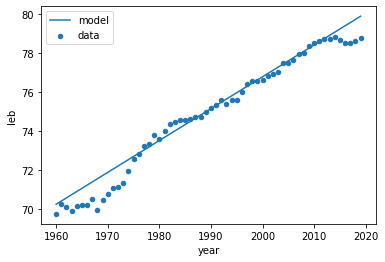

In [21]:
# -- plot the data and the model 
ax = wbdat.plot("year", "leb", kind="scatter", label="data")
x = np.arange(1960, 2020, 1)
y = slope[-1]*x + intercept[-1]
ax.plot(x, y, label="model")
ax.legend();

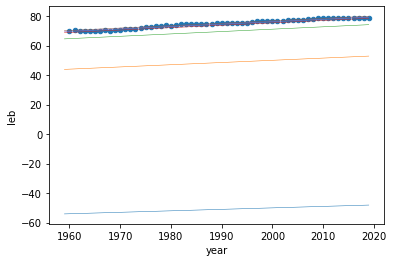

In [22]:
# -- plot all lines learned
ax = wbdat.plot("year", "leb", kind="scatter")
x = np.arange(1959, 2020, 1)
for s, i in zip(slope, intercept):
  y = s*x + i
  ax.plot(x, y, lw=0.5)

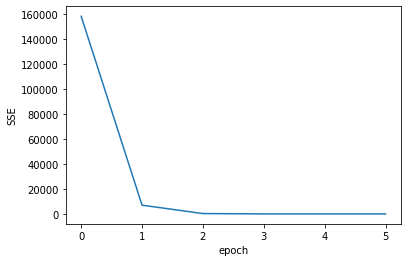

In [23]:
# -- plot the sum of squared errors after each step
plt.plot(sse)
plt.xlabel("epoch")
plt.ylabel("SSE");

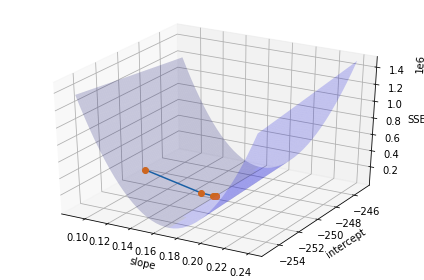

In [24]:
# -- plot the SSE surface and the gradient descent's search for best slope and intercept

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')

ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("SSE")

def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)

ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(X, Y, theta) 
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)

fig.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import r2_score

Y_pred = slope[-1]*X + intercept[-1]
print("r2 of model = {0:.1f}%".format(r2_score(Y, Y_pred)*100))

r2 of model = 96.3%
